<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/new_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merged_df_3.csv to merged_df_3.csv


In [6]:
import pandas as pd
df = pd.read_csv('merged_df_3.csv')
df.head()

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,2007-01-01,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN
1,02 Aragón,2007-01-01,NaN,NaN,NaN,175.582,NaN,NaN,NaN,NaN
2,"03 Asturias, Principado de",2007-01-01,NaN,NaN,NaN,138.726,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",2007-01-01,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN
4,05 Canarias,2007-01-01,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN


In [7]:
df

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,2007-01-01,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN
1,02 Aragón,2007-01-01,NaN,NaN,NaN,175.582,NaN,NaN,NaN,NaN
2,"03 Asturias, Principado de",2007-01-01,NaN,NaN,NaN,138.726,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",2007-01-01,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN
4,05 Canarias,2007-01-01,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2715,"15 Navarra, Comunidad Foral de",2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2716,16 País Vasco,2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2717,"17 Rioja, La",2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2718,Nacional,2024-11-01,5665204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

%matplotlib inline
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
import numpy as np
import statistics
import pylab

#pylab.rcParams['figure.figsize'] = (10., 15.)
sns.set(font_scale=1.5)
sns.set_style("white")


In [11]:
df = df[df['Period'] >= '2015-01-01'].reset_index(drop=True)
df

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers
0,01 Andalucía,2015-01-01,NaN,NaN,NaN,96.637,504.6,3734660.0,4132582.0,NaN
1,02 Aragón,2015-01-01,NaN,NaN,NaN,98.632,427.9,457726.0,532954.0,NaN
2,"03 Asturias, Principado de",2015-01-01,NaN,NaN,NaN,97.509,519.4,404159.0,519529.0,NaN
3,"04 Balears, Illes",2015-01-01,NaN,NaN,NaN,95.424,800.6,766736.0,892903.0,NaN
4,05 Canarias,2015-01-01,NaN,NaN,NaN,97.087,594.1,1144978.0,1253565.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2139,"15 Navarra, Comunidad Foral de",2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,16 País Vasco,2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,"17 Rioja, La",2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,Nacional,2024-11-01,5665204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_filtered_monthly_tourists = df.dropna(subset=['Monthly_number_of_tourists'])


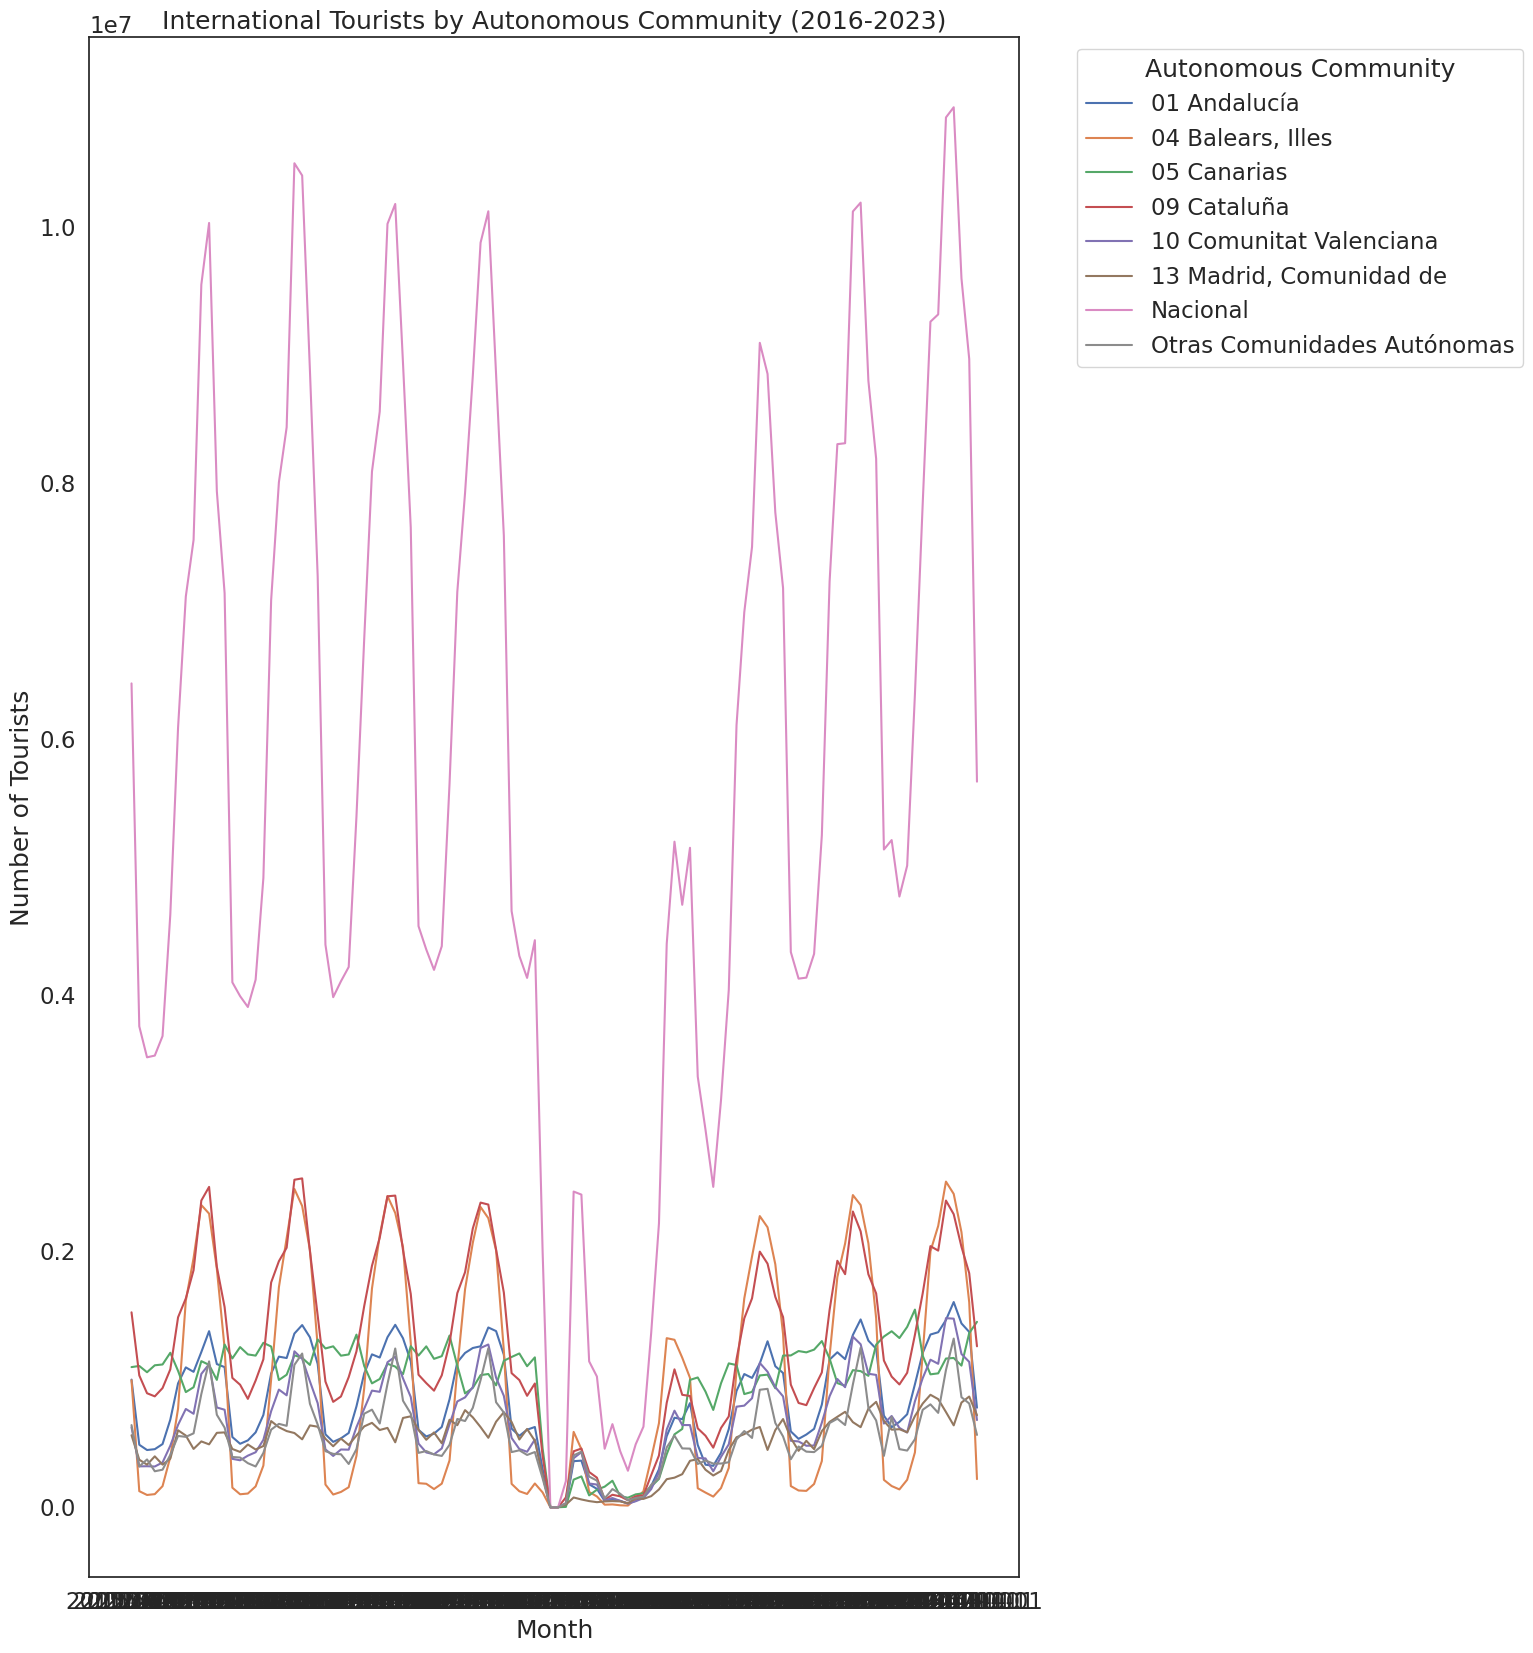

<Figure size 1200x2000 with 0 Axes>

In [13]:
pylab.rcParams['figure.figsize'] = (12, 20)


sns.lineplot(data=df_filtered_monthly_tourists, x='Period', y='Monthly_number_of_tourists', hue='Autonomous_community')

# Customize the plot
plt.title('International Tourists by Autonomous Community (2016-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Tourists')

# Highlight Covid
#plt.axvline(x=2020,color='black',linestyle='dashed', label='Covid')

plt.legend(title='Autonomous Community', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(12, 20))


#Display the plot
plt.show()
